# **Decision Tree Classifier**

A decision tree is a popular and widely used machine learning algorithm for both classification and regression tasks. It is a predictive model that maps features (input variables) to a target variable (output) through a tree-like structure of if-else decision rules.

https://medium.com/analytics-vidhya/decision-trees-explained-in-simple-steps-39ee1a6b00a2

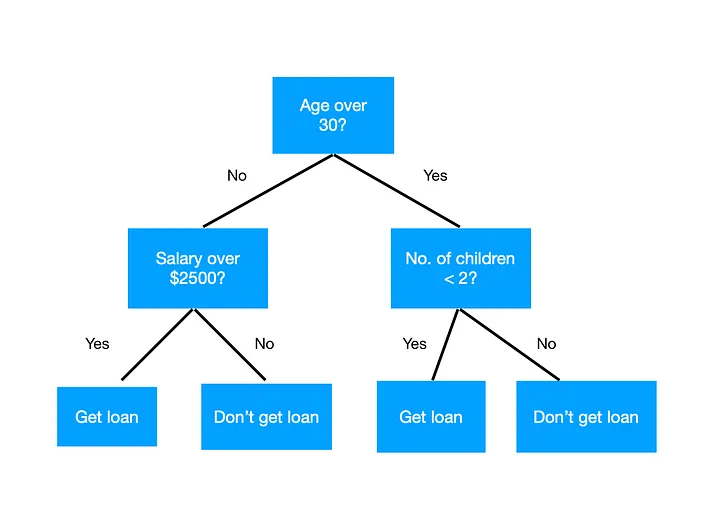

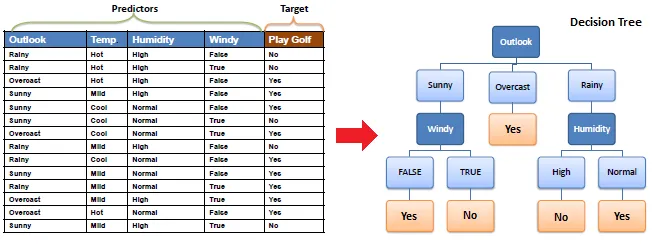

# **Basic DTC**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
dff = pd.read_csv("weather_forecast.csv")
dff

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

x = dff.drop('Play',axis = 1)
y = dff['Play']

for col in x.columns:
  x[col] = LabelEncoder().fit_transform(x[col])

lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
x

,Outlook,Temperature,Humidity,Windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



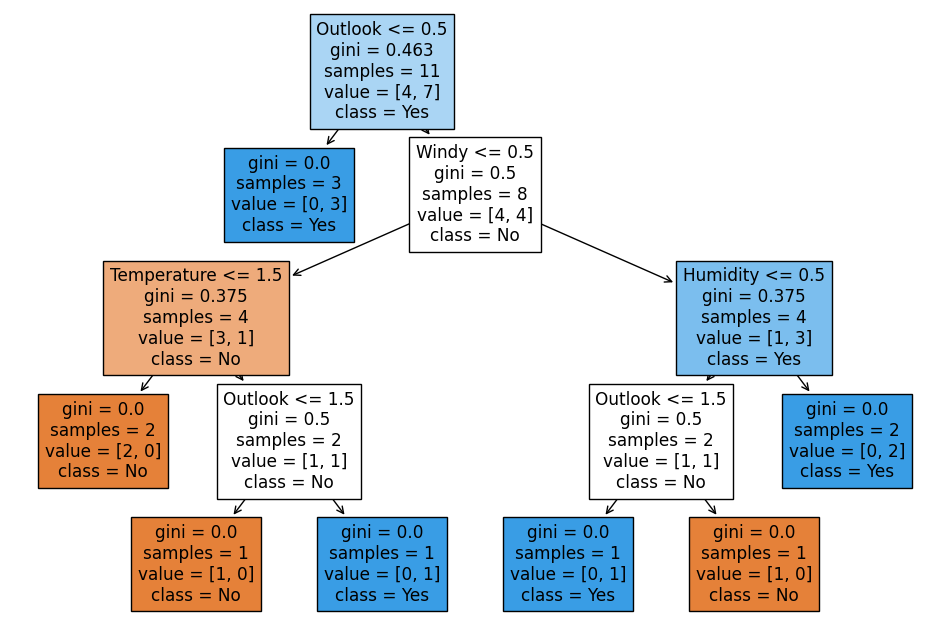

In [ ]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

# **On a Larger Dataset**

In [ ]:
df = pd.read_csv('weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-12,0.0,12.8,5.0,4.7,drizzle
1,02-01-12,10.9,10.6,2.8,4.5,rain
2,03-01-12,0.8,11.7,7.2,2.3,rain
3,04-01-12,20.3,12.2,5.6,4.7,rain
4,05-01-12,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-15,8.6,4.4,1.7,2.9,rain
1457,28-12-15,1.5,5.0,1.7,1.3,rain
1458,29-12-15,0.0,7.2,0.6,2.6,fog
1459,30-12-15,0.0,5.6,-1.0,3.4,sun


In [ ]:
new_df = df.drop('date',axis =1)
new_df.head(3)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain


In [ ]:
new_df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
lb = LabelEncoder()
new_df['weather'] = lb.fit_transform(new_df['weather'])

In [ ]:
new_df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
x = new_df.drop(['weather'],axis = 1)
y = new_df['weather']

In [ ]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.7440273  0.7739726  0.75342466 0.75       0.81506849]
Mean score: 0.7672986114357847


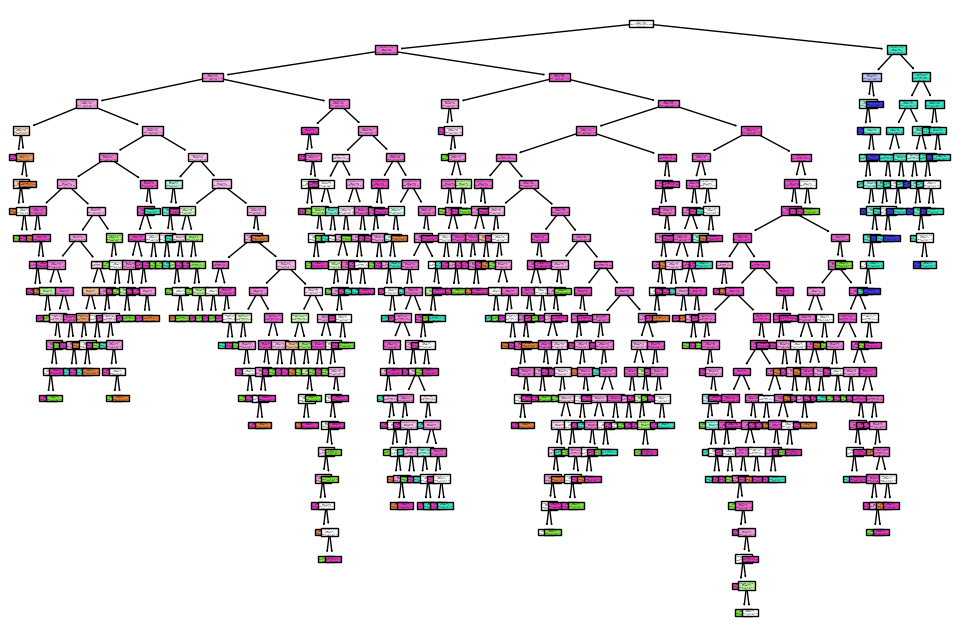

In [ ]:
from sklearn import tree
clf.fit(x,y)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [x for x in range(2,10)]
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1,scoring = 'accuracy',cv=5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print(best_model)

DecisionTreeClassifier(max_depth=3)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(best_model, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.83276451 0.86986301 0.84931507 0.8390411  0.87328767]
Mean score: 0.8528542708869045


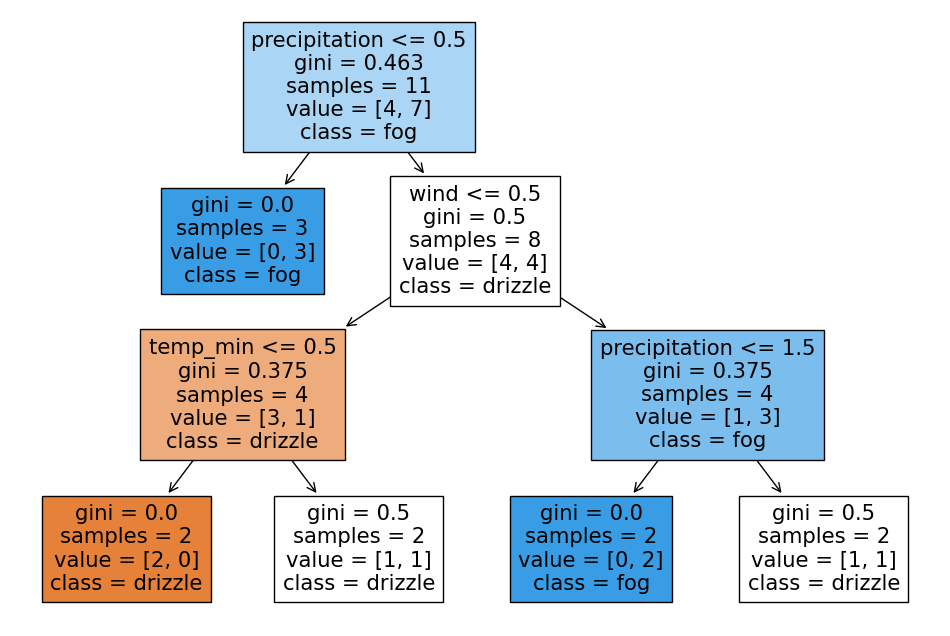

In [ ]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()